In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import glob
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

Lista de ideas

* Automatización de la exportación de datos del dranetz, es posible?
* Medición de corrientes con las 4 pinzas del Dranetz. Objetivo, obtener todos los valore instantáneos de tensión y corriente para hacer el procesamiento en el notebook.
* En definitita el estudio se resume en el estudio de esas formas de ondas y su comportamiento en transitorio y estacionario a diferentes escalas.
* Probar los resulados de la FFT en el notebook con las librerías del procesamiento de señales.
* Prueba de dos canales mirar hacia la izquiera y hacia la derecha a la vez: válido para Dranetz y Microchip.

# Carga de datos

Hard-ad-hoc


In [ ]:
datos_hardadhoc=pd.read_csv("/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Hard-adhoc/04011323052.csv",delimiter=';',header=0,index_col=False)
datos_hardadhoc

,DIA,HORA,UrmsA(V),UrmsB(V),UrmsC(V),IrmsA(A),IrmsB(A),IrmsC(A),IrmsN(A),PmeanA(W),...,PFmeanC,PFmeanT,THDNUA(%),THDNUB(%),THDNUC(%),THDNIA(%),THDNIB(%),THDNIC(%),Frec.(Hz),Temp.(ºC)
0,2021/04/01,14:21:53,231.25,0.07,0.0,0.00,0.11,0.03,0.39,-2.0,...,-0.0,-0.31,1.33,0.0,0.0,0.0,0.0,0.0,49.0,28.0
1,2021/04/01,14:21:53,231.08,0.07,0.0,0.03,0.06,0.05,0.18,-2.0,...,-0.0,-1.00,1.57,0.0,0.0,0.0,0.0,0.0,49.0,28.0
2,2021/04/01,14:21:53,231.19,0.07,0.0,0.00,0.03,0.06,0.10,-2.0,...,-0.0,-1.00,1.37,0.0,0.0,0.0,0.0,0.0,49.0,28.0
3,2021/04/01,14:21:54,231.40,0.07,0.0,0.00,0.04,0.08,0.05,-2.0,...,-0.0,-0.31,1.23,0.0,0.0,0.0,0.0,0.0,49.0,28.0
4,2021/04/01,14:21:54,231.35,0.07,0.0,0.03,0.04,0.02,0.12,-2.0,...,-0.0,-0.12,1.49,0.0,0.0,0.0,0.0,0.0,49.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440545,2021/04/03,07:08:09,233.17,0.07,0.0,0.01,0.00,0.06,0.29,-2.0,...,-0.0,-0.96,0.94,0.0,0.0,0.0,0.0,0.0,49.0,28.0
440546,2021/04/03,07:08:10,233.16,0.07,0.0,0.00,0.02,0.09,0.44,-2.0,...,-0.0,-1.00,0.81,0.0,0.0,0.0,0.0,0.0,49.0,28.0
440547,2021/04/03,07:08:10,233.25,0.07,0.0,0.03,0.06,0.04,0.16,-2.0,...,-0.0,-0.35,0.79,0.0,0.0,0.0,0.0,0.0,49.0,28.0
440548,2021/04/03,07:08:10,233.26,0.07,0.0,0.03,0.04,0.01,0.03,-2.0,...,-0.0,-0.33,0.80,0.0,0.0,0.0,0.0,0.0,49.0,28.0


In [ ]:
print(datos_hardadhoc.isnull().sum())

DIA            0
HORA           0
UrmsA(V)       0
UrmsB(V)       0
UrmsC(V)       0
IrmsA(A)       0
IrmsB(A)       0
IrmsC(A)       0
IrmsN(A)       0
PmeanA(W)      0
PmeanB(W)      0
PmeanC(W)      0
PmeanT(W)      0
QmeanA(VAR)    0
QmeanB(VAR)    0
QmeanC(VAR)    0
QmeanT(VAR)    0
SmeanA(VA)     0
SmeanB(VA)     0
SmeanC(VA)     0
SmeanT(VA)     0
PFmeanA        0
PFmeanB        0
PFmeanC        0
PFmeanT        0
THDNUA(%)      0
THDNUB(%)      0
THDNUC(%)      0
THDNIA(%)      0
THDNIB(%)      0
THDNIC(%)      0
Frec.(Hz)      0
Temp.(ºC)      0
dtype: int64


NameError: name 'UNIT' is not defined

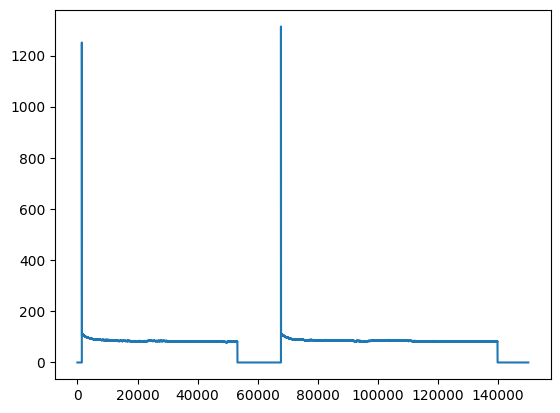

In [ ]:
#plt.figure(figsize=(19*2,17.8))
plt.plot(datos_hardadhoc.index[0:150000],datos_hardadhoc['PmeanA(W)'][0:150000], label='hard adhoc')
plt.plot(UNIT.index[0:150000],UNIT.P_AVG[0:150000], label='unit 283A')
#plt.xlim([200000, 200005])
plt.xlabel('samples')
plt.ylabel('P[W]')
#plt.title('Fridge active power [W]')
plt.grid()
plt.legend()
plt.savefig('Fridge active power [W]_unit_hadhadoc')



TypeError: Axes.stem() got an unexpected keyword argument 'use_line_collection'

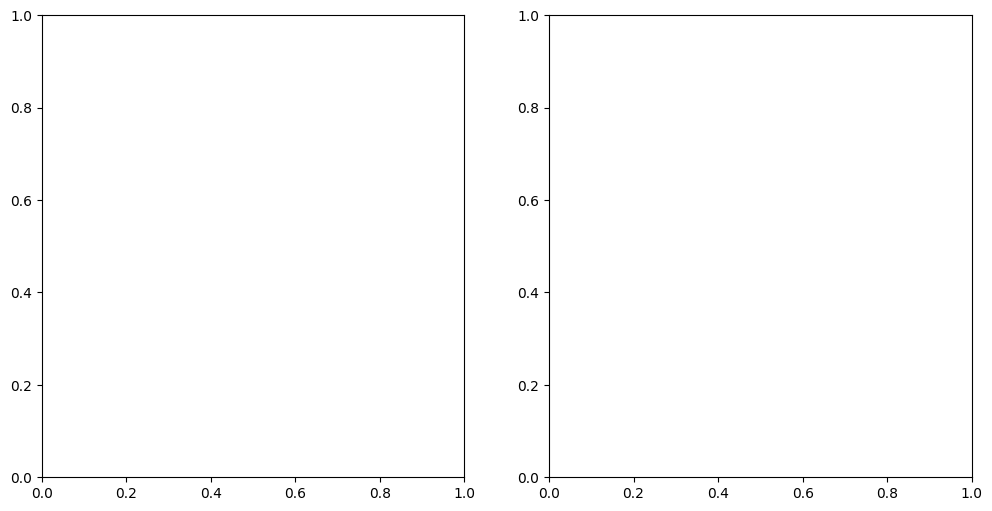

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Frecuencia fundamental
f0 = 440  # Hz (La 4)

# Generar armónicos (hasta el 10° armónico)
n_armonicos = 10
arm_precisos = np.array([f0 * (i + 1) for i in range(n_armonicos)])
arm_menos_precisos = arm_precisos + np.random.normal(0, 5, n_armonicos)  # Añadimos ruido

# Intensidad de los armónicos (decay logarítmico para el preciso)
int_preciso = 1 / (np.arange(1, n_armonicos + 1) ** 1.2)
int_menos_preciso = int_preciso * np.random.uniform(0.8, 1.2, n_armonicos)  # Variación en amplitud

# Gráfica del espectro
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Espectro preciso
ax[0].stem(arm_precisos, int_preciso, basefmt=" ", use_line_collection=True)
ax[0].set_title("Instrumento Preciso")
ax[0].set_xlabel("Frecuencia (Hz)")
ax[0].set_ylabel("Intensidad")
ax[0].set_ylim(0, 1)
ax[0].set_xlim(0, 5000)

# Espectro menos preciso
ax[1].stem(arm_menos_precisos, int_menos_preciso, basefmt=" ", use_line_collection=True)
ax[1].set_title("Instrumento Menos Preciso")
ax[1].set_xlabel("Frecuencia (Hz)")
ax[1].set_ylabel("Intensidad")
ax[1].set_ylim(0, 1)
ax[1].set_xlim(0, 5000)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Frecuencia fundamental
f0 = 440  # Hz (La 4)

# Generar armónicos (hasta el 10° armónico)
n_armonicos = 10
arm_precisos = np.array([f0 * (i + 1) for i in range(n_armonicos)])
arm_menos_precisos = arm_precisos + np.random.normal(0, 5, n_armonicos)  # Añadimos ruido

# Intensidad de los armónicos (decay logarítmico para el preciso)
int_preciso = 1 / (np.arange(1, n_armonicos + 1) ** 1.2)
int_menos_preciso = int_preciso * np.random.uniform(0.8, 1.2, n_armonicos)  # Variación en amplitud

# Gráfica del espectro superpuesto
plt.figure(figsize=(10, 6))

# Espectro preciso
plt.stem(arm_precisos, int_preciso, basefmt=" ", linefmt='b-', markerfmt='bo', label="UNIT-283A", use_line_collection=True)

# Espectro menos preciso
plt.stem(arm_menos_precisos, int_menos_preciso, basefmt=" ", linefmt='r--', markerfmt='ro', label="Hard ad-hoc", use_line_collection=True)

# Configuraciones del gráfico
#plt.title("Comparación de Espectros Armónicos: Preciso vs Menos Preciso")
#plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Intensidad [A]")
plt.ylim(0, 1)
plt.xlim(0, 5000)
plt.legend()
plt.grid(True)

plt.show()

Zoom en los valles

In [ ]:
zoom=datos_hardadhoc[440000:440100]

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(zoom.index,zoom['IrmsA(A)'])

In [ ]:
datos_hardadhoc[440000:440100].describe()

In [ ]:
zoom2=datos_hardadhoc[60000:60100]
zoom2

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(zoom2.index, zoom2['IrmsA(A)'])

In [ ]:
zoom2.describe()

UNIT-UT283 A

* En dos partes por la capacidad del progrma propietario UT283A

In [ ]:
datos_unit_1=pd.read_csv('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/UNIT-UT283A/1/Base.csv', header=0, delimiter=',')
datos_unit_1

,Time,URMS_AVG,URMS_MAX,URMS_MIN,IRMS_AVG,IRMS_MAX,IRMS_MIN,FREQ_AVG,FREQ_MAX,FREQ_MIN,...,Uac_MIN,Idc_AVG,Idc_MAX,Idc_MIN,Iac_AVG,Iac_MAX,Iac_MIN,KF_AVG,KF_MAX,KF_MIN
0,1/1/2000 00:57:08,231.154114,231.154114,231.154114,0.015352,0.015352,0.015352,49.988102,49.988102,49.988102,...,231.136841,-0.000631,-0.000631,-0.000631,0.013176,0.013176,0.013176,10.358896,10.358896,10.358896
1,1/1/2000 00:57:09,230.909515,230.909515,230.909515,0.015353,0.015353,0.015353,49.988701,49.988701,49.988701,...,230.792023,-0.000621,-0.000621,-0.000621,0.013216,0.013216,0.013216,9.411060,9.411060,9.411060
2,1/1/2000 00:57:10,231.085922,231.085922,231.085922,0.015367,0.015367,0.015367,49.988422,49.988422,49.988422,...,231.144302,-0.000673,-0.000673,-0.000673,0.013153,0.013153,0.013153,9.985609,9.985609,9.985609
3,1/1/2000 00:57:11,231.291763,231.291763,231.291763,0.015343,0.015343,0.015343,49.979561,49.979561,49.979561,...,231.222092,-0.000613,-0.000613,-0.000613,0.013166,0.013166,0.013166,9.974781,9.974781,9.974781
4,1/1/2000 00:57:12,231.285248,231.285248,231.285248,0.015337,0.015337,0.015337,49.979939,49.979939,49.979939,...,231.228958,-0.000587,-0.000587,-0.000587,0.013154,0.013154,0.013154,9.257197,9.257197,9.257197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86568,2/1/2000 00:59:56,228.437714,228.437714,228.437714,0.774321,0.774321,0.774321,49.996449,49.996449,49.996449,...,228.370575,-0.000305,-0.000305,-0.000305,0.777279,0.777279,0.777279,1.051409,1.051409,1.051409
86569,2/1/2000 00:59:57,228.383820,228.383820,228.383820,0.772741,0.772741,0.772741,49.996357,49.996357,49.996357,...,228.282410,-0.000663,-0.000663,-0.000663,0.765713,0.765713,0.765713,1.051115,1.051115,1.051115
86570,2/1/2000 00:59:58,228.209381,228.209381,228.209381,0.772758,0.772758,0.772758,49.996250,49.996250,49.996250,...,228.035492,-0.000747,-0.000747,-0.000747,0.765713,0.765713,0.765713,1.051115,1.051115,1.051115
86571,2/1/2000 00:59:59,227.333511,227.333511,227.333511,0.766831,0.766831,0.766831,49.996498,49.996498,49.996498,...,227.258224,-0.000451,-0.000451,-0.000451,0.763420,0.763420,0.763420,1.057979,1.057979,1.057979


In [ ]:
datos_unit_1.describe()

,URMS_AVG,URMS_MAX,URMS_MIN,IRMS_AVG,IRMS_MAX,IRMS_MIN,FREQ_AVG,FREQ_MAX,FREQ_MIN,P_AVG,...,Uac_MIN,Idc_AVG,Idc_MAX,Idc_MIN,Iac_AVG,Iac_MAX,Iac_MIN,KF_AVG,KF_MAX,KF_MIN
count,86573.000000,86573.000000,86573.000000,86573.000000,86573.000000,86573.000000,86573.000000,86573.000000,86573.000000,86573.000000,...,86573.000000,86573.000000,86573.000000,86573.000000,86573.000000,86573.000000,86573.000000,86573.000000,86573.000000,86573.000000
mean,231.996269,231.996269,231.996269,0.640288,0.640288,0.640288,50.018245,50.018245,50.018245,71.504113,...,231.921443,-0.000552,-0.000552,-0.000552,0.639680,0.639680,0.639680,1.615226,1.615226,1.615226
std,3.028006,3.028006,3.028006,0.318552,0.318552,0.318552,0.039500,0.039500,0.039500,36.343734,...,3.027488,0.000433,0.000433,0.000433,0.318486,0.318486,0.318486,1.177922,1.177922,1.177922
min,222.407990,222.407990,222.407990,0.014202,0.014202,0.014202,49.911491,49.911491,49.911491,-1.354101,...,222.346756,-0.011278,-0.011278,-0.011278,0.012967,0.012967,0.012967,1.020888,1.020888,1.020888
25%,229.800568,229.800568,229.800568,0.768126,0.768126,0.768126,49.990097,49.990097,49.990097,85.146233,...,229.729279,-0.000697,-0.000697,-0.000697,0.766521,0.766521,0.766521,1.053332,1.053332,1.053332
50%,232.569885,232.569885,232.569885,0.794999,0.794999,0.794999,50.016678,50.016678,50.016678,87.440285,...,232.495499,-0.000534,-0.000534,-0.000534,0.794460,0.794460,0.794460,1.060514,1.060514,1.060514
75%,234.291107,234.291107,234.291107,0.810112,0.810112,0.810112,50.036537,50.036537,50.036537,89.915802,...,234.216858,-0.000427,-0.000427,-0.000427,0.810302,0.810302,0.810302,1.073746,1.073746,1.073746
max,239.727142,239.727142,239.727142,5.655886,5.655886,5.655886,50.295246,50.295246,50.295246,1289.210815,...,239.667221,0.075105,0.075105,0.075105,6.049442,6.049442,6.049442,15.815260,15.815260,15.815260


In [ ]:
datos_unit_2=pd.read_csv('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/UNIT-UT283A/2/Base.csv', header=0, delimiter=',')
datos_unit_2

<ipython-input-20-f6dbda0e5d03>:1: DtypeWarning: Columns (7,10,13,25) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_unit_2=pd.read_csv('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/UNIT-UT283A/2/Base.csv', header=0, delimiter=',')


,Time,URMS_AVG,URMS_MAX,URMS_MIN,IRMS_AVG,IRMS_MAX,IRMS_MIN,FREQ_AVG,FREQ_MAX,FREQ_MIN,...,Uac_MIN,Idc_AVG,Idc_MAX,Idc_MIN,Iac_AVG,Iac_MAX,Iac_MIN,KF_AVG,KF_MAX,KF_MIN
0,2/1/2000 01:00:01,227.387222,227.387222,227.387222,0.767279,0.767279,0.767279,49.997154,49.997154,49.997154,...,227.311600,-0.000473,-0.000473,-0.000473,0.772528,0.772528,0.772528,1.053422,1.053422,1.053422
1,2/1/2000 01:00:02,227.478729,227.478729,227.478729,0.769046,0.769046,0.769046,49.996552,49.996552,49.996552,...,227.419540,-0.000509,-0.000509,-0.000509,0.773638,0.773638,0.773638,1.053529,1.053529,1.053529
2,2/1/2000 01:00:03,227.453964,227.453964,227.453964,0.768676,0.768676,0.768676,49.993835,49.993835,49.993835,...,227.371613,-0.000573,-0.000573,-0.000573,0.772772,0.772772,0.772772,1.051742,1.051742,1.051742
3,2/1/2000 01:00:04,227.452911,227.452911,227.452911,0.769165,0.769165,0.769165,49.991703,49.991703,49.991703,...,227.380722,-0.000094,-0.000094,-0.000094,0.770323,0.770323,0.770323,1.050814,1.050814,1.050814
4,2/1/2000 01:00:05,227.360489,227.360489,227.360489,0.768200,0.768200,0.768200,49.986221,49.986221,49.986221,...,227.289536,-0.000547,-0.000547,-0.000547,0.763189,0.763189,0.763189,1.051215,1.051215,1.051215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68535,2/1/2000 20:02:16,229.555679,229.555679,229.555679,0.821564,0.821564,0.821564,50.0117492675781,50.011749,50.011749,...,229.524536,-0.000170,-0.000170,-0.000170,0.813905,0.813905,0.813905,1.070151,1.070151,1.070151
68536,2/1/2000 20:02:17,229.594086,229.594086,229.594086,0.821859,0.821859,0.821859,50.0134887695313,50.013489,50.013489,...,229.496674,-0.000918,-0.000918,-0.000918,0.813905,0.813905,0.813905,1.070151,1.070151,1.070151
68537,2/1/2000 20:02:18,229.493469,229.493469,229.493469,0.818146,0.818146,0.818146,50.0180931091309,50.018093,50.018093,...,229.391037,-0.000822,-0.000822,-0.000822,0.811087,0.811087,0.811087,1.065550,1.065550,1.065550
68538,2/1/2000 20:02:19,229.444031,229.444031,229.444031,0.820602,0.820602,0.820602,50.0249366760254,50.024937,50.024937,...,229.383621,-0.000295,-0.000295,-0.000295,0.812461,0.812461,0.812461,1.065502,1.065502,1.065502


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
my_list=[datos_unit_1,datos_unit_2]

In [ ]:
UNIT=pd.concat(my_list,join="inner", ignore_index=True)

In [ ]:
UNIT

In [ ]:
print(UNIT.isnull().sum())

Time         0
URMS_AVG     0
URMS_MAX     0
URMS_MIN     0
IRMS_AVG     0
IRMS_MAX     0
IRMS_MIN     0
FREQ_AVG     0
FREQ_MAX     0
FREQ_MIN     0
P_AVG        0
P_MAX        0
P_MIN        0
Q_AVG        0
Q_MAX        0
Q_MIN        0
S_AVG        0
S_MAX        0
S_MIN        0
UTHDR_AVG    0
UTHDR_MAX    0
UTHDR_MIN    0
ITHDR_AVG    0
ITHDR_MAX    0
ITHDR_MIN    0
PF_AVG       0
PF_MAX       0
PF_MIN       0
PST_AVG      0
PST_MAX      0
PST_MIN      0
UCF_AVG      0
UCF_MAX      0
UCF_MIN      0
ICF_AVG      0
ICF_MAX      0
ICF_MIN      0
Udc_AVG      0
Udc_MAX      0
Udc_MIN      0
Uac_AVG      0
Uac_MAX      0
Uac_MIN      0
Idc_AVG      0
Idc_MAX      0
Idc_MIN      0
Iac_AVG      0
Iac_MAX      0
Iac_MIN      0
KF_AVG       0
KF_MAX       0
KF_MIN       0
dtype: int64


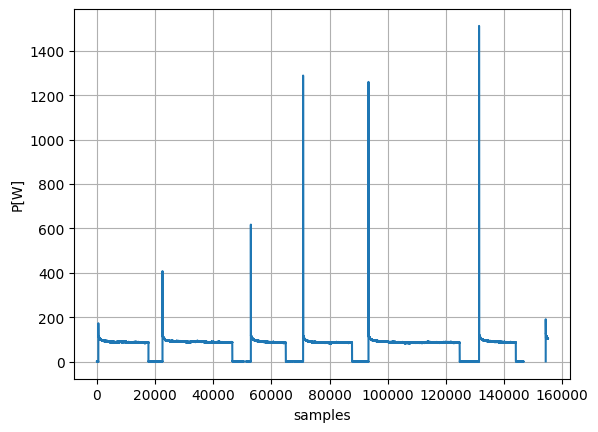

In [ ]:
#plt.figure(figsize=(19*2,17.8))
plt.plot(UNIT.index,UNIT.P_AVG)

plt.xlabel('samples')
plt.ylabel('P[W]')
#plt.title('Fridge active power [W]')
plt.grid()

plt.savefig('Fridge active power [W]')


In [ ]:
zoom_unit=UNIT[20000:20100]

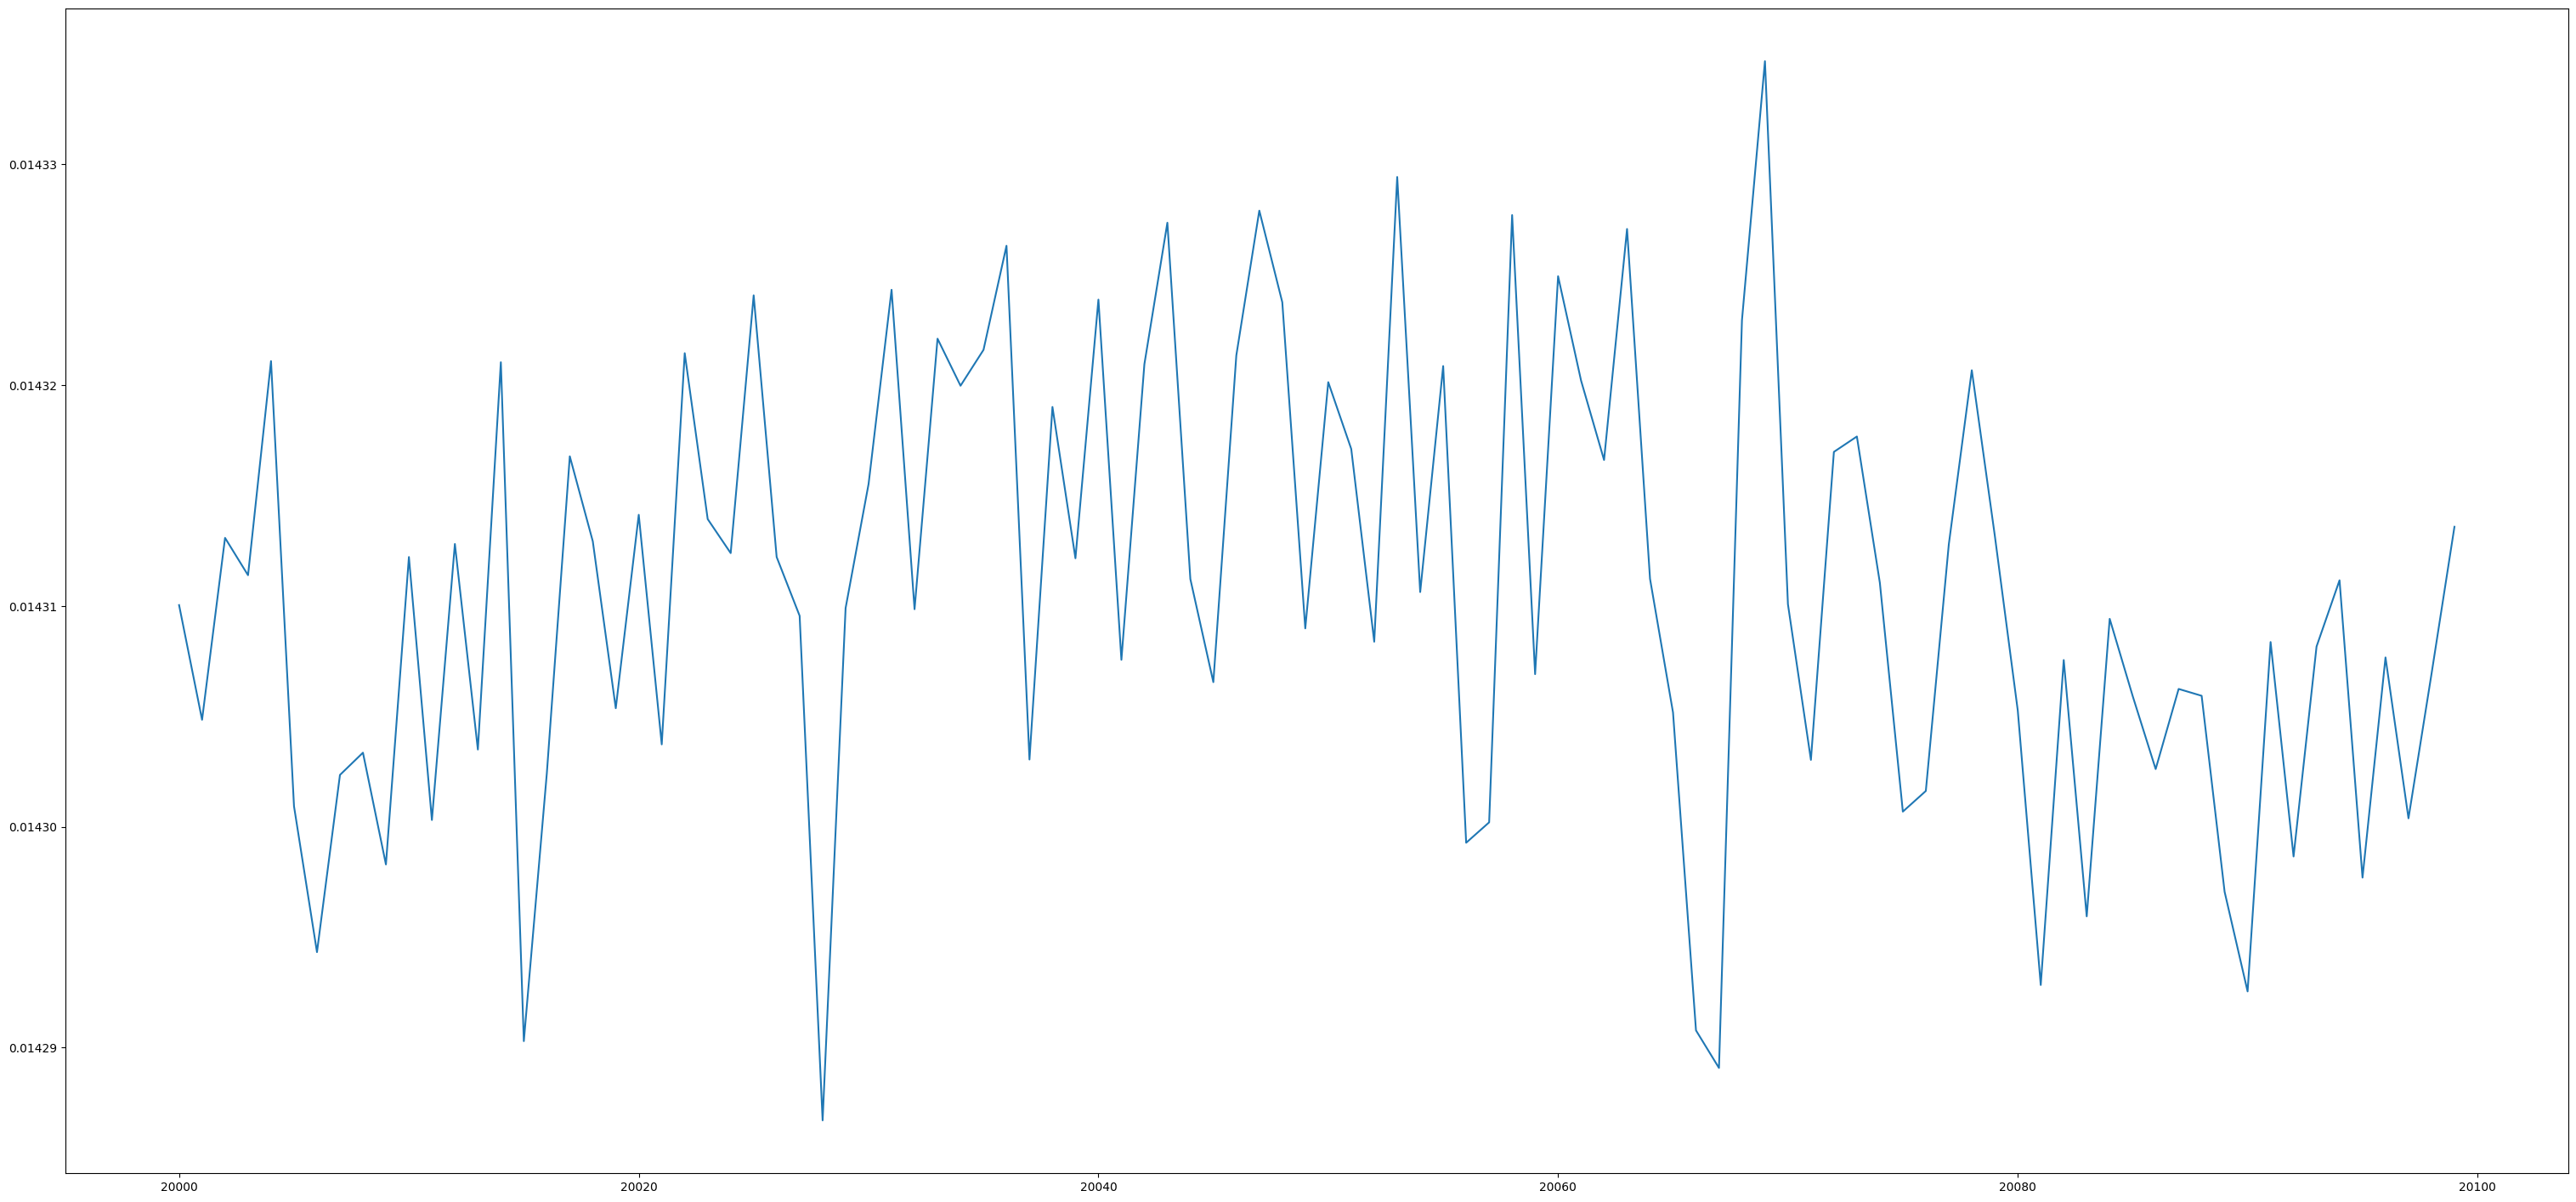

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(zoom_unit.index, zoom_unit['IRMS_AVG'])

Al observar

In [ ]:
UNIT.describe()

Exportar a CSV

In [ ]:
#UNIT.to_csv (r'/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/UNIT-UT283A\export_dataframe.csv', index = False, header=True)

Armónicos de la corriente

In [ ]:
datos_unit_arm1=pd.read_csv('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/UNIT-UT283A/1/IHarm.csv', header=0, delimiter=',')
datos_unit_arm1

In [ ]:
datos_unit_arm1.describe()

In [ ]:
datos_unit_arm2=pd.read_csv('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/UNIT-UT283A/2/IHarm.csv', header=0, delimiter=',')
datos_unit_arm2

In [ ]:
my_list=[datos_unit_arm1,datos_unit_arm2]

In [ ]:
UNIT_arm_I=pd.concat(my_list,join="inner", ignore_index=True)

In [ ]:
UNIT_arm_I.describe()

Armónicos de la tensión

In [ ]:
datos_unit_armU1=pd.read_csv('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/UNIT-UT283A/1/UHarm.csv', header=0, delimiter=',')


In [ ]:
datos_unit_armU2=pd.read_csv('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/UNIT-UT283A/2/UHarm.csv', header=0, delimiter=',')


In [ ]:
my_list=[datos_unit_armU1,datos_unit_armU2]

In [ ]:
UNIT_arm_U=pd.concat(my_list,join="inner", ignore_index=True)

In [ ]:
UNIT_arm_U.describe()

Dranetz

Corriente y tensión rms

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/U_I/*.txt')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/U_I/*.txt'
for i in sorted(glob.glob(path)):
  print(i)
for i in sorted(glob.glob(path)):
  df=pd.read_csv(i,delimiter=';',encoding="ISO-8859-1",header=0,)
  my_list.append(df)
  #sorted(my_list)
  df_U_I_concat=pd.concat(my_list,join="inner", ignore_index=True)
  df_U_I_concat

In [ ]:
 df_U_I_concat

In [ ]:
print(df_U_I_concat.isnull().sum())

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(df_U_I_concat.index, df_U_I_concat['AIrmsValor[Amperios]'])

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(df_U_I_concat.index, df_U_I_concat['AVrmsValor[Voltios]'])

Potencias y factor de potencia

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/PQSPF/*.txt')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/PQSPF/*.txt'
for i in sorted(glob.glob(path)):
  print(i)
  df=pd.read_csv(i,delimiter=';',encoding="ISO-8859-1",header=0,)
  my_list.append(df)
  #for filename in sorted(glob.glob(os.path.join(directory, "*.txt"))):
  #sorted(my_list)
  df_PQSPF_concat=pd.concat(my_list,join="inner", ignore_index=True)




In [ ]:
df_PQSPF_concat

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(df_PQSPF_concat.index, df_PQSPF_concat['TOTP(kW)Máx[kW]'])

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(df_PQSPF_concat.index, df_PQSPF_concat['TOTQ-Fnd(kVAR)Máx[kVAR]'])

Armónicos

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Armónicos/*.txt')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Armónicos/*.txt'
for i in sorted(glob.glob(path)):
  print(i)
for i in glob.glob(path):
  df=pd.read_csv(i,delimiter=';',encoding="ISO-8859-1",header=0,)
  my_list.append(df)
  #sorted(my_list)
  df_arm_concat=pd.concat(my_list,join="inner", ignore_index=True)

In [ ]:
 df_arm_concat

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(df_arm_concat.index, df_arm_concat['AIArmo(150.0Hz)Valor[Amperios]'])

In [ ]:
df_arm_concat.describe()

Wbox

P

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/P/*.xlsx')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/P/*.xlsx'
for i in glob.glob(path):
  print(i)
for i in glob.glob(path):
  df=pd.read_excel(i)
  my_list.append(pd.read_excel(i))
  df_todos_P=pd.concat(my_list,join="inner", ignore_index=True)
  df_todos_P

  #df_todos_P=df_todos.drop(['Circuito 2','Circuito 3', 'Total'], axis=1)
df_todos_P['Circuit 3'].replace(
    to_replace=['---'],
    value=0,
    inplace=True
)
fig3=df_todos_P.plot("Date","Circuit 3")

df_todos_P=df_todos_P.drop(['Circuit 1','Circuit 2'], axis=1)
df_todos_P['Circuit 3'].replace(
    to_replace=['---'],
   value=0,
   inplace=True
)
#fig3=df_todos_P.plot("Date","Circuit 3")

In [ ]:
df_todos_P

In [ ]:
df_todos_P.describe()

Q

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/Q/*.xlsx')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/Q/*.xlsx'
for i in glob.glob(path):
  print(i)
for i in glob.glob(path):
  df=pd.read_excel(i)
  my_list.append(pd.read_excel(i))
  df_todosQ=pd.concat(my_list,join="inner", ignore_index=True)
  df_todosQ

  #df_todos_P=df_todos.drop(['Circuito 2','Circuito 3', 'Total'], axis=1)
df_todosQ['Circuit 3'].replace(
    to_replace=['---'],
    value=0,
    inplace=True
)
fig3=df_todosQ.plot("Date","Circuit 3")

In [ ]:
df_todosQ.describe()

S

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/S/*.xlsx')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/S/*.xlsx'
for i in glob.glob(path):
  print(i)
for i in glob.glob(path):
  df=pd.read_excel(i)
  my_list.append(pd.read_excel(i))
  df_todosS=pd.concat(my_list,join="inner", ignore_index=True)
  df_todosS

  #df_todos_P=df_todos.drop(['Circuito 2','Circuito 3', 'Total'], axis=1)
df_todosS['Circuit 3'].replace(
    to_replace=['---'],
    value=0,
    inplace=True
)
fig3=df_todosS.plot("Date","Circuit 3")

In [ ]:
df_todosS

In [ ]:
df_todosS.describe()

PF

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/PF/*.xlsx')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/PF/*.xlsx'
for i in glob.glob(path):
  print(i)
for i in glob.glob(path):
  df=pd.read_excel(i)
  my_list.append(pd.read_excel(i))
  df_todosPF=pd.concat(my_list,join="inner", ignore_index=True)
  df_todosPF

  #df_todos_P=df_todos.drop(['Circuito 2','Circuito 3', 'Total'], axis=1)
df_todosPF['Circuit 3'].replace(
    to_replace=['---'],
    value=0,
    inplace=True
)
fig3=df_todosPF.plot("Date","Circuit 3")

In [ ]:
df_todosPF.describe()

I

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/I/*.xlsx')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/I/*.xlsx'
for i in glob.glob(path):
  print(i)
for i in glob.glob(path):
  df=pd.read_excel(i)
  my_list.append(pd.read_excel(i))
  df_todos_I=pd.concat(my_list,join="inner", ignore_index=True)
  df_todos_I

  #df_todos_P=df_todos.drop(['Circuito 2','Circuito 3', 'Total'], axis=1)
df_todos_I['Circuit 3'].replace(
    to_replace=['---'],
    value=0,
    inplace=True
)
fig3=df_todos_I.plot("Date","Circuit 3")

In [ ]:
df_todos_I.describe()

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(df_todos_I.index, df_todos_I['Circuit 3'])

U

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/U/*.xlsx')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/U/*.xlsx'
for i in glob.glob(path):
  print(i)
for i in glob.glob(path):
  df=pd.read_excel(i)
  my_list.append(pd.read_excel(i))
  df_todos_U=pd.concat(my_list,join="inner", ignore_index=True)
  df_todos_U

  #df_todos_P=df_todos.drop(['Circuito 2','Circuito 3', 'Total'], axis=1)
df_todos_U['Circuit 3'].replace(
    to_replace=['---'],
    value=0,
    inplace=True
)
fig3=df_todos_U.plot("Date","Circuit 3")

In [ ]:
df_todos_U

In [ ]:
df_todos_U.describe()

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(df_todos_U.index, df_todos_U['Circuit 3'])

THD_impar_corriente

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/%THD_impar_I/*.xlsx')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/%THD_impar_I/*.xlsx'
for i in glob.glob(path):
  print(i)
for i in glob.glob(path):
  df=pd.read_excel(i)
  my_list.append(pd.read_excel(i))
  df_todosTHD=pd.concat(my_list,join="inner", ignore_index=True)
  df_todosTHD

  #df_todos_P=df_todos.drop(['Circuito 2','Circuito 3', 'Total'], axis=1)
df_todosTHD['Circuit 3'].replace(
    to_replace=['---'],
    value=0,
    inplace=True
)
fig3=df_todosTHD.plot("Date","Circuit 3")

THD_impar_tensión

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/%THD_impar_U/*.xlsx')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/%THD_impar_U/*.xlsx'
for i in glob.glob(path):
  print(i)
for i in glob.glob(path):
  df=pd.read_excel(i)
  my_list.append(pd.read_excel(i))
  df_todosTHD_U=pd.concat(my_list,join="inner", ignore_index=True)
  df_todosTHD_U

  #df_todos_P=df_todos.drop(['Circuito 2','Circuito 3', 'Total'], axis=1)
df_todosTHD_U['Circuit 3'].replace(
    to_replace=['---'],
    value=0,
    inplace=True
)
fig3=df_todosTHD_U.plot("Date","Circuit 3")

In [ ]:
df_todosTHD_U

In [ ]:
df_todosTHD.describe()

3er_arm_corriente

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/3erm_i/*.xlsx')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/3erm_i/*.xlsx'
for i in glob.glob(path):
  print(i)
for i in glob.glob(path):
  df=pd.read_excel(i)
  my_list.append(pd.read_excel(i))
  df_todos3arm=pd.concat(my_list,join="inner", ignore_index=True)
  df_todos3arm

  #df_todos_P=df_todos.drop(['Circuito 2','Circuito 3', 'Total'], axis=1)
df_todos3arm['Circuit 3'].replace(
    to_replace=['---'],
    value=0,
    inplace=True
)
fig3=df_todos3arm.plot("Date","Circuit 3")

5to_arm_corriente

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/5arm_i/*.xlsx')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/5arm_i/*.xlsx'
for i in glob.glob(path):
  print(i)
for i in glob.glob(path):
  df=pd.read_excel(i)
  my_list.append(pd.read_excel(i))
  df_todos5toarm=pd.concat(my_list,join="inner", ignore_index=True)
  df_todos5toarm

  #df_todos_P=df_todos.drop(['Circuito 2','Circuito 3', 'Total'], axis=1)
df_todos5toarm['Circuit 3'].replace(
    to_replace=['---'],
    value=0,
    inplace=True
)
fig3=df_todos5toarm.plot("Date","Circuit 3")

7mo_arm_corriente

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/7mo_i/*.xlsx')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/7mo_i/*.xlsx'
for i in glob.glob(path):
  print(i)
for i in glob.glob(path):
  df=pd.read_excel(i)
  my_list.append(pd.read_excel(i))
  df_todos7moarm=pd.concat(my_list,join="inner", ignore_index=True)
  df_todos7moarm

  #df_todos_P=df_todos.drop(['Circuito 2','Circuito 3', 'Total'], axis=1)
df_todos7moarm['Circuit 3'].replace(
    to_replace=['---'],
    value=0,
    inplace=True
)
fig3=df_todos7moarm.plot("Date","Circuit 3")

9no_arm_corriente

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/9no_i/*.xlsx')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/9no_i/*.xlsx'
for i in glob.glob(path):
  print(i)
for i in glob.glob(path):
  df=pd.read_excel(i)
  my_list.append(pd.read_excel(i))
  df_todos9noarm=pd.concat(my_list,join="inner", ignore_index=True)
  df_todos9noarm

  #df_todos_P=df_todos.drop(['Circuito 2','Circuito 3', 'Total'], axis=1)
df_todos9noarm['Circuit 3'].replace(
    to_replace=['---'],
    value=0,
    inplace=True
)
fig3=df_todos9noarm.plot("Date","Circuit 3")

[]


NameError: name 'df_todos9noarm' is not defined

3er_arm_U

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/3er_arm_U/*.xlsx')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/3er_arm_U/*.xlsx'
for i in glob.glob(path):
  print(i)
for i in glob.glob(path):
  df=pd.read_excel(i)
  my_list.append(pd.read_excel(i))
  df_todos3erarmu=pd.concat(my_list,join="inner", ignore_index=True)
  df_todos3erarmu

  #df_todos_P=df_todos.drop(['Circuito 2','Circuito 3', 'Total'], axis=1)
df_todos3erarmu['Circuit 3'].replace(
    to_replace=['---'],
    value=0,
    inplace=True
)
fig3=df_todos3erarmu.plot("Date","Circuit 3")

In [ ]:
df_todos3erarmu.describe()

NameError: name 'df_todos3erarmu' is not defined

5to_arm_U

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/5to_arm_U/*.xlsx')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/5to_arm_U/*.xlsx'
for i in glob.glob(path):
  print(i)
for i in glob.glob(path):
  df=pd.read_excel(i)
  my_list.append(pd.read_excel(i))
  df_todos5toarmu=pd.concat(my_list,join="inner", ignore_index=True)
  df_todos5toarmu

  #df_todos_P=df_todos.drop(['Circuito 2','Circuito 3', 'Total'], axis=1)
df_todos5toarmu['Circuit 3'].replace(
    to_replace=['---'],
    value=0,
    inplace=True
)
fig3=df_todos5toarmu.plot("Date","Circuit 3")

7mo arm U

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/7mo_arm_U/*.xlsx')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/7mo_arm_U/*.xlsx'
for i in glob.glob(path):
  print(i)
for i in glob.glob(path):
  df=pd.read_excel(i)
  my_list.append(pd.read_excel(i))
  df_todos7moarmu=pd.concat(my_list,join="inner", ignore_index=True)
  df_todos7moarmu

  #df_todos_P=df_todos.drop(['Circuito 2','Circuito 3', 'Total'], axis=1)
df_todos7moarmu['Circuit 3'].replace(
    to_replace=['---'],
    value=0,
    inplace=True
)
fig3=df_todos7moarmu.plot("Date","Circuit 3")

[]


NameError: name 'df_todos7moarmu' is not defined

9no arm U

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/9no_arm_U/*.xlsx')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/WBOX/9no_arm_U/*.xlsx'
for i in glob.glob(path):
  print(i)
for i in glob.glob(path):
  df=pd.read_excel(i)
  my_list.append(pd.read_excel(i))
  df_todos9noarmU=pd.concat(my_list,join="inner", ignore_index=True)
  df_todos9noarmU

  #df_todos_P=df_todos.drop(['Circuito 2','Circuito 3', 'Total'], axis=1)
df_todos9noarmU['Circuit 3'].replace(
    to_replace=['---'],
    value=0,
    inplace=True
)
fig3=df_todos9noarmU.plot("Date","Circuit 3")

[]


NameError: name 'df_todos9noarmU' is not defined

# El proceso descriptivo - estadística básica

**Hard ad-hoc**

In [ ]:
datos_hardadhoc.describe()

In [ ]:
corr=datos_hardadhoc.corr()
plt.figure(figsize=(50,50))
sns.heatmap(corr,cbar=True, square=True, annot=True, fmt='.2f', annot_kws={'size':15},cmap='coolwarm')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

NameError: name 'datos_hardadhoc' is not defined

**UNIT**

In [ ]:
UNIT.describe()

In [ ]:
corr=UNIT.corr()
plt.figure(figsize=(50,50))
sns.heatmap(corr,cbar=True, square=True, annot=True, fmt='.2f', annot_kws={'size':15},cmap='coolwarm')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

**Dranetz**

In [ ]:
  df_U_I_concat.describe()

In [ ]:
df_arm_concat.describe()

In [ ]:
df_PQSPF_concat.describe()

In [ ]:
plt.plot(df_PQSPF_concat.index, df_PQSPF_concat['TOTP(kW)Máx[kW]'])

# Indexación e identificación de eventos

In [ ]:
#evento_1.loc[evento_1['AIrmsValor[Amperios]'].idxmax()]

In [ ]:
#reqd_Index = evento_1[evento_1['Datos X']=='10/03/2021 03:08:54.804185152'].index.tolist()
#print(reqd_Index)

In [ ]:
#evento_1.loc[evento_1['AIrmsValor[Amperios]']==0.770700]

In [ ]:
#evento_2=df_U_I_concat[mask_evento_2]   ###Acá están los outliers
#evento_2

# Eventos para la extracción de la forma de onda

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(df_U_I_concat.index, df_U_I_concat['AIrmsValor[Amperios]'])
#plt.savefig('formadeondacorriente.png')

NameError: name 'df_U_I_concat' is not defined

<Figure size 3800x1780 with 0 Axes>

In [ ]:
mask_evento= df_U_I_concat['AIrmsValor[Amperios]']>2

evento_arranque=df_U_I_concat[mask_evento]   ###Acá están los outliers
evento_arranque

In [ ]:
evento_arranque['Datos X'].unique()

Evento - transitorio - encendido

* 01/04/2021 - 14:38:58
* 01/04/2021 - 20:46:48
* 02/04/2021 - 05:13:25
* 02/04/2021 - 10:12:58
* 02/04/2021 - 16:27:50
* 03/04/2021 - 03:01:47
* 03/04/2021 - 09:23:55  ### restablecimiento por corte de suministro

# Eventos - forma de onda a 12 kHz

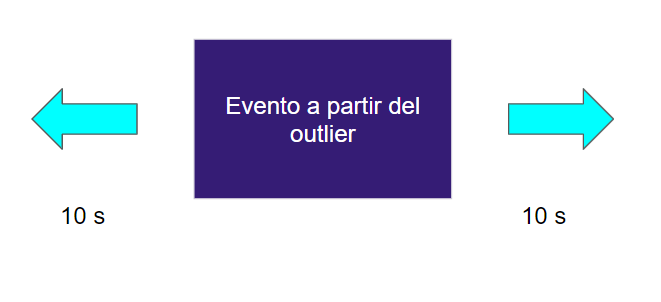

Ventanas 2560 valores \\
2560*21=53760

Evento Nº1

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº1/*.txt')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº1/*.txt'
for i in sorted(glob.glob(path)):
  print(i)
  df=pd.read_csv(i,delimiter=';',encoding="ISO-8859-1",header=0,)
  my_list.append(df)
  #for filename in sorted(glob.glob(os.path.join(directory, "*.txt"))):
  #sorted(my_list)
  df_evento_1=pd.concat(my_list,join="inner", ignore_index=True)

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(df_evento_1.index, df_evento_1['AIValor[Amperios]'])

En estas 21 ventanas observamos el estado cero, transiorio y estacionario.

Subevento Nº1 - transitorio del apagado

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº1/subeventoapagado_1/*.txt')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº1/subeventoapagado_1/*.txt'
for i in sorted(glob.glob(path)):
  print(i)
  df=pd.read_csv(i,delimiter=';',encoding="ISO-8859-1",header=0,)
  my_list.append(df)
  #for filename in sorted(glob.glob(os.path.join(directory, "*.txt"))):
  #sorted(my_list)
  df_subevento_1=pd.concat(my_list,join="inner", ignore_index=True)

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(df_subevento_1.index, df_subevento_1['AIValor[Amperios]'])

DFT y THD en el evento de encendido

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº1/THD y armónicos encendido evento N°1/*.txt')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº1/THD y armónicos encendido evento N°1/*.txt'
for i in sorted(glob.glob(path)):
  print(i)
  df=pd.read_csv(i,delimiter=';',encoding="ISO-8859-1",header=0,)
  my_list.append(df)
  #for filename in sorted(glob.glob(os.path.join(directory, "*.txt"))):
  #sorted(my_list)
  df_THD_arm_evento1=pd.concat(my_list,join="inner", ignore_index=True)

In [ ]:
df_THD_arm_evento1

In [ ]:
df_sin_THD=df_THD_arm_evento1[df_THD_arm_evento1['Datos X']!='THD']

In [ ]:
df_sin_THD

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(df_THD_arm_evento1.index, df_THD_arm_evento1['AIArmoValor[Amperios]'])

Evolución del THD en el encendido

In [ ]:
THD=df_THD_arm_evento1 [df_THD_arm_evento1['Datos X']=='THD']
THD

Evolución del THD en el evento N°1

In [ ]:
plt.plot(THD.index, THD['AIArmoValor[Amperios]'])

Totalizador de cómo va variando el evento N°1 - La variación del espectro de armónicos (componente a componente) durante el transitorio.

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.bar(df_sin_THD['Datos X'], df_sin_THD['AIArmoValor[Amperios]'])
plt.xticks(size = 'small', color = 'black', rotation = 90)
plt.savefig("espectro.png")
plt.show()



Evento Nº2

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº2/*.txt')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº2/*.txt'
for i in sorted(glob.glob(path)):
  print(i)
  df=pd.read_csv(i,delimiter=';',encoding="ISO-8859-1",header=0,)
  my_list.append(df)
  #for filename in sorted(glob.glob(os.path.join(directory, "*.txt"))):
  #sorted(my_list)
  df_evento_2=pd.concat(my_list,join="inner", ignore_index=True)

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(df_evento_2.index, df_evento_2['AIValor[Amperios]'])

Subvevento 2 - apagado

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº2/subeventoapagado2/*.txt')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº2/subeventoapagado2/*.txt'
for i in sorted(glob.glob(path)):
  print(i)
  df=pd.read_csv(i,delimiter=';',encoding="ISO-8859-1",header=0,)
  my_list.append(df)
  #for filename in sorted(glob.glob(os.path.join(directory, "*.txt"))):
  #sorted(my_list)
  df_subevento_2=pd.concat(my_list,join="inner", ignore_index=True)

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(df_subevento_2.index, df_subevento_2['AIValor[Amperios]'])

DFT - THD y armónicos

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº2/THD y armónicos_Encendido - evento N°2/*.txt')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº2/THD y armónicos_Encendido - evento N°2/*.txt'
for i in sorted(glob.glob(path)):
  print(i)
  df=pd.read_csv(i,delimiter=';',encoding="ISO-8859-1",header=0,)
  my_list.append(df)
  #for filename in sorted(glob.glob(os.path.join(directory, "*.txt"))):
  #sorted(my_list)
  df_DFT_evento2=pd.concat(my_list,join="inner", ignore_index=True)

In [ ]:
df_DFT_evento2

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(df_DFT_evento2.index, df_DFT_evento2['AIArmoValor[Amperios]'])

Evolución del THD en el evento de encendido

In [ ]:
THD=df_DFT_evento2[df_DFT_evento2['Datos X']=='THD']
print(THD)
plt.plot(THD.index, THD['AIArmoValor[Amperios]'])

Evento N°3

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº3/*.txt')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº3/*.txt'
for i in sorted(glob.glob(path)):
  print(i)
  df=pd.read_csv(i,delimiter=';',encoding="ISO-8859-1",header=0,)
  my_list.append(df)
  #for filename in sorted(glob.glob(os.path.join(directory, "*.txt"))):
  #sorted(my_list)
  df_evento_3=pd.concat(my_list,join="inner", ignore_index=True)

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(df_evento_3.index, df_evento_3['AIValor[Amperios]'])

DFT y THD

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº3/THD y armónicos_Encendido-evento N°3/*.txt')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº3/THD y armónicos_Encendido-evento N°3/*.txt'
for i in sorted(glob.glob(path)):
  print(i)
  df=pd.read_csv(i,delimiter=';',encoding="ISO-8859-1",header=0,)
  my_list.append(df)
  #for filename in sorted(glob.glob(os.path.join(directory, "*.txt"))):
  #sorted(my_list)
  df_DFT_evento_3=pd.concat(my_list,join="inner", ignore_index=True)

In [ ]:
df_DFT_evento_3

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(df_DFT_evento_3.index, df_DFT_evento_3['AIArmoValor[Amperios]'])

Evolución del THD y armónicos


In [ ]:
THD=df_DFT_evento_3[df_DFT_evento_3['Datos X']=='THD']
print(THD)
plt.plot(THD.index, THD['AIArmoValor[Amperios]'])

Apagado evento Nº3

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº3/subeventoNº3/*.txt')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº3/subeventoNº3/*.txt'
for i in sorted(glob.glob(path)):
  print(i)
  df=pd.read_csv(i,delimiter=';',encoding="ISO-8859-1",header=0,)
  my_list.append(df)
  #for filename in sorted(glob.glob(os.path.join(directory, "*.txt"))):
  #sorted(my_list)
  df_subevento_3=pd.concat(my_list,join="inner", ignore_index=True)

[]


In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(df_subevento_3.index, df_subevento_3['AIValor[Amperios]'])

NameError: name 'df_subevento_3' is not defined

<Figure size 3800x1780 with 0 Axes>

Evento N°4

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº4/*.txt')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº4/*.txt'
for i in sorted(glob.glob(path)):
  print(i)
  df=pd.read_csv(i,delimiter=';',encoding="ISO-8859-1",header=0,)
  my_list.append(df)
  #for filename in sorted(glob.glob(os.path.join(directory, "*.txt"))):
  #sorted(my_list)
  df_evento_4=pd.concat(my_list,join="inner", ignore_index=True)

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(df_evento_4.index, df_evento_4['AIValor[Amperios]'])

Subevento Nº4

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº4/subeventoNº4/*.txt')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº4/subeventoNº4/*.txt'
for i in sorted(glob.glob(path)):
  print(i)
  df=pd.read_csv(i,delimiter=';',encoding="ISO-8859-1",header=0,)
  my_list.append(df)
  #for filename in sorted(glob.glob(os.path.join(directory, "*.txt"))):
  #sorted(my_list)
  df_subevento_4=pd.concat(my_list,join="inner", ignore_index=True)

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(df_subevento_4.index, df_subevento_4['AIValor[Amperios]'])

DFT y THD

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº4/THD y armónicos_Encendido-eventoN°4/*.txt')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº4/THD y armónicos_Encendido-eventoN°4/*.txt'
for i in sorted(glob.glob(path)):
  print(i)
  df=pd.read_csv(i,delimiter=';',encoding="ISO-8859-1",header=0,)
  my_list.append(df)
  #for filename in sorted(glob.glob(os.path.join(directory, "*.txt"))):
  #sorted(my_list)
  df_DFT_THD_evento4=pd.concat(my_list,join="inner", ignore_index=True)

In [ ]:
df_DFT_THD_evento4

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(df_DFT_THD_evento4.index, df_DFT_THD_evento4['AIArmoValor[Amperios]'])

In [ ]:
THD=df_DFT_THD_evento4[df_DFT_THD_evento4['Datos X']=='THD']
print(THD)
plt.plot(THD.index, THD['AIArmoValor[Amperios]'])

Evento N°5

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº5/*.txt')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº5/*.txt'
for i in sorted(glob.glob(path)):
  print(i)
  df=pd.read_csv(i,delimiter=';',encoding="ISO-8859-1",header=0,)
  my_list.append(df)
  #for filename in sorted(glob.glob(os.path.join(directory, "*.txt"))):
  #sorted(my_list)
  df_evento_5=pd.concat(my_list,join="inner", ignore_index=True)

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(df_evento_5.index, df_evento_5['AIValor[Amperios]'])

Subevento Nº5

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº5/subeventoNº5/*.txt')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº5/subeventoNº5/*.txt'
for i in sorted(glob.glob(path)):
  print(i)
  df=pd.read_csv(i,delimiter=';',encoding="ISO-8859-1",header=0,)
  my_list.append(df)
  #for filename in sorted(glob.glob(os.path.join(directory, "*.txt"))):
  #sorted(my_list)
  df_subevento_5=pd.concat(my_list,join="inner", ignore_index=True)

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(df_subevento_5.index, df_subevento_5['AIValor[Amperios]'])

DFT y THD

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº5/THD y armónicos_Encendidos_evento N°5/*.txt')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº5/THD y armónicos_Encendidos_evento N°5/*.txt'
for i in sorted(glob.glob(path)):
  print(i)
  df=pd.read_csv(i,delimiter=';',encoding="ISO-8859-1",header=0,)
  my_list.append(df)
  #for filename in sorted(glob.glob(os.path.join(directory, "*.txt"))):
  #sorted(my_list)
  df_DFT_evento_5=pd.concat(my_list,join="inner", ignore_index=True)

In [ ]:
df_DFT_evento_5

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(df_DFT_evento_5.index, df_DFT_evento_5['AIArmoValor[Amperios]'])

In [ ]:
THD=df_DFT_evento_5[df_DFT_evento_5['Datos X']=='THD']
print(THD)
plt.plot(THD.index, THD['AIArmoValor[Amperios]'])

Evento N°6

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº6/*.txt')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº6/*.txt'
for i in sorted(glob.glob(path)):
  print(i)
  df=pd.read_csv(i,delimiter=';',encoding="ISO-8859-1",header=0,)
  my_list.append(df)
  #for filename in sorted(glob.glob(os.path.join(directory, "*.txt"))):
  #sorted(my_list)
  df_evento_6=pd.concat(my_list,join="inner", ignore_index=True)

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(df_evento_6.index, df_evento_6['AIValor[Amperios]'])

subeventoNº6

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº6/subeventoNº6/*.txt')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº6/subeventoNº6/*.txt'
for i in sorted(glob.glob(path)):
  print(i)
  df=pd.read_csv(i,delimiter=';',encoding="ISO-8859-1",header=0,)
  my_list.append(df)
  #for filename in sorted(glob.glob(os.path.join(directory, "*.txt"))):
  #sorted(my_list)
  df_subevento_6=pd.concat(my_list,join="inner", ignore_index=True)

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(df_subevento_6.index, df_subevento_6['AIValor[Amperios]'])

DFT y harmónicos en el evento de encendido

In [ ]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº6/THD y armónicos_Encendido-evento N°6/*.txt')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/Forma_de_onda_eventos_12k/Evento Nº6/THD y armónicos_Encendido-evento N°6/*.txt'
for i in sorted(glob.glob(path)):
  print(i)
  df=pd.read_csv(i,delimiter=';',encoding="ISO-8859-1",header=0,)
  my_list.append(df)
  #for filename in sorted(glob.glob(os.path.join(directory, "*.txt"))):
  #sorted(my_list)
  df_DFT_evento6=pd.concat(my_list,join="inner", ignore_index=True)

In [ ]:
df_DFT_evento6

In [ ]:
df_sin_THD=df_DFT_evento6.drop(0, axis=0)


In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(df_sin_THD.index, df_sin_THD['AIArmoValor[Amperios]'])

In [ ]:
THD=df_DFT_evento6[df_DFT_evento6['Datos X']=='THD']
print(THD)
plt.plot(THD.index, THD['AIArmoValor[Amperios]'])

**FFT** sobre ventana de evento N°1

In [ ]:
domiciliario_ventana_para_FFT=pd.read_csv('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/FFT/domiciliario_01_ventana_para_FFT.txt',delimiter=';',encoding="ISO-8859-1",header=0,)
domiciliario_ventana_para_FFT

In [ ]:
plt.plot(domiciliario_ventana_para_FFT.index,domiciliario_ventana_para_FFT['AIValor[Amperios]'])

In [ ]:

import scipy.fftpack as fourier
x=domiciliario_ventana_para_FFT['AIValor[Amperios]']
lista=x.tolist()  ### pasar a lista

In [ ]:
Ts = 0.0008                                       # Definimos un tiempo y frecuencia de muestreo
Fs=1/Ts

In [ ]:
gk = fourier.fft(lista)                             # Calculamos la FFT
M_gk = abs(gk)                                  # Calculamos la Magnitud de la FFT

F = Fs*np.arange(0, len(lista))/len(lista)              # Definimos el Vector de Frecuencias

plt.plot(F, M_gk)
plt.xlabel('Frecuencia (Hz)', fontsize='14')
plt.ylabel('Amplitud FFT', fontsize='14')
plt.show()

In [ ]:
fourier = np.fft.fft(x)
n = x.size
timestep = 0.1
freq = np.fft.fftfreq(n, d=timestep)
freq

In [ ]:
df_freq=pd.DataFrame(freq)
plt.plot(df_freq.index, freq)

THD%

Resultados del Dranetz

In [ ]:
domiciliario_ventana_para_FFT=pd.read_csv('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Heladera_Maxihouse/Dranetz/FFT/domiciliario_01_FFT_sobre_ventana.txt',delimiter=';',encoding="ISO-8859-1",header=0,)
domiciliario_ventana_para_FFT

%TDH y armónicos a partir de los eventos - 5 archivos a la izq y a la derecha, a partir del evento ENCENDIDO y APAGADO.

Extra - una prueba con ventana anterior y posterior

In [ ]:
domiciliario_02=pd.read_csv('/content/drive/MyDrive/Doctorado CyT, Maxi/Piloto (sistema de medición)/pruebas separadas Dranetz - transitorios/domiciliario_11_ventana_post_evento.txt',delimiter=';',encoding="ISO-8859-1",header=0,)
domiciliario_02

In [ ]:
plt.plot(domiciliario_02.index, domiciliario_02['AIValor[Amperios]'])

In [ ]:
A=domiciliario_02['AIValor[Amperios]']
B=domiciliario_02['AVValor[Voltios]']

In [ ]:
Irms=np.sqrt(((A - A.mean(axis=0))**2).mean())
Irms

In [ ]:
Urms=np.sqrt(((B - B.mean(axis=0))**2).mean())
Urms

In [ ]:
C=A*B

In [ ]:
plt.plot(C.index, C)

In [ ]:
plt.plot(A, B)
plt.grid()
plt.show()

In [ ]:
import math

In [ ]:
B.max()

In [ ]:
teta=math.asin(293.6135/B.max())
teta  ###Desfase estimado con Lissajous

#**Prueba de dos canales de tensión y corriente - Microchip y Dranetz con tostadora y heladera**

Hard-adhoc

In [ ]:
datos_hardadhoc_2=pd.read_csv("/content/drive/MyDrive/Doctorado CyT, Maxi/Piloto (sistema de medición)/Prueba dos canales/Hard-adhoc/04071213.054",delimiter=';',header=0,index_col=False)
datos_hardadhoc_2

In [ ]:
datos_hardadhoc_2.describe()

In [ ]:
plt.plot(datos_hardadhoc_2.index, datos_hardadhoc_2['IrmsB(A)'], datos_hardadhoc_2.index,datos_hardadhoc_2['IrmsA(A)'] )
plt.grid()
plt.show()

In [ ]:
plt.plot(datos_hardadhoc_2.index, datos_hardadhoc_2['UrmsA(V)'] )
plt.grid()
plt.show()

Dranetz

In [ ]:
domiciliario_fasepartida=pd.read_csv('/content/drive/MyDrive/Doctorado CyT, Maxi/Piloto (sistema de medición)/Prueba dos canales/Dranetz/domiciliario12ayb_00_U_Ia_Ib.txt',delimiter=';',encoding="ISO-8859-1",header=0,)
domiciliario_fasepartida

In [ ]:
plt.plot(domiciliario_fasepartida.index, domiciliario_fasepartida['AVValor[Voltios]'])

In [ ]:
plt.plot(domiciliario_fasepartida.index, domiciliario_fasepartida['AIValor[Amperios]'], domiciliario_fasepartida.index, domiciliario_fasepartida['BIValor[Amperios]'])

Valor medio

Y=$\frac{1}{T}\int_0^T f(t) dt$

Valor eficaz

$Y=\sqrt{\frac {1}{T}\int_0^T [f(t)]^2 dt}$

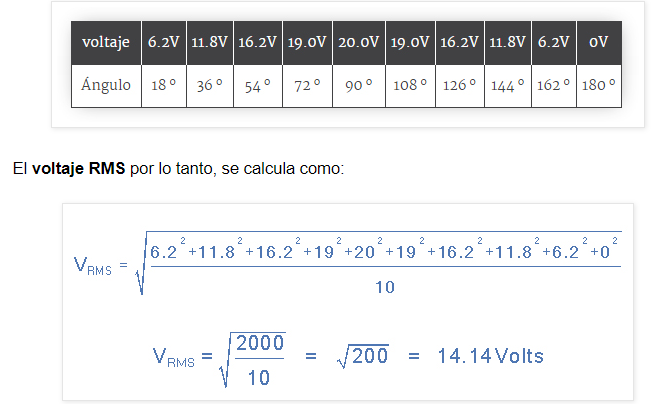

image.png

In [ ]:
Y=domiciliario_fasepartida['BIValor[Amperios]']   #### Del conjunto
U=domiciliario_fasepartida['AVValor[Voltios]']

In [ ]:
Y.shape

De lo que devuelve el DranView, sería, el rms calculado en grupos de  

In [ ]:
rms = np.sqrt(np.mean(Y**2))
rms

In [ ]:
rms = np.sqrt(np.mean(U**2))
rms

Si les saco el rms a los primeros 20, tendría la información procesada del DranView. Los rms que me muestra.

In [ ]:
muestra=domiciliario_fasepartida
muestra

In [ ]:
muestra[100:130]

In [ ]:

plt.figure(figsize=(19*2,17.8))
plt.plot(muestra.index, muestra['AIValor[Amperios]'])
plt.grid()

In [ ]:
V=muestra['AVValor[Voltios]']
V

In [ ]:
I=muestra['AIValor[Amperios]']
I

NameError: name 'muestra' is not defined

Detección de cruce por ceros, ejemplo de juguete

In [ ]:
def zero_crossing(data):
    return np.where(np.diff(np.sign(np.array(data))))[0]

df1 = pd.DataFrame({'a':[1,2,-1,5,0,9,-6,7]},index=[100,101,102,103,104,105,106,107])
df1



print(zero_crossing(df1['a']))

In [ ]:
df1.index[zero_crossing(df1['a'])]

Ejemplo real con U e I

In [ ]:
def zero_crossing(data):
    return np.where(np.diff(np.sign(np.array(data))))[0]

print(zero_crossing(V))


In [ ]:
muestra[172:257]

In [ ]:
Z_I=zero_crossing(I)
print(zero_crossing(I))

In [ ]:
#fi= (tdiff*360)/20 ms; tddiff=tiempo de cruce por ceros de cada una de las señales
#Para este caso, considerando el índice 255 para V y el índice 172 para I. la diferencia de tiempo correspondiente es 6.4 ms

#cosfi(aprox)= 0.42, Dranetz marca 0.47 mean.

Observación: Ni siquiera hay que calcular el factor de potencia con nuestro modelo. El indicador diferencia de tiempo del cruce por zeros es suficiente.

**RMS VALUE**

In [ ]:
YY=muestra['AIValor[Amperios]']
rms=np.sqrt(np.mean(YY**2))
rms

**Valor rms discretos de dos valores de la ventana de 1 s, con total 2560 valores**

In [ ]:
intervalo=[2,28,50,100,200,1000,2559]    ### Valores rms a partir de distintos bins de la ventana de un segundo.
for i in intervalo:
  rms=np.sqrt((YY[0:i]**2).sum()/YY[0:i].size)
  print(rms)

In [ ]:

rms = np.sqrt ((YY[0:2559] ** 2) .sum ()/YY[0:2559].size)
rms

In [ ]:
res = YY.groupby(np.arange(len(YY))//2).agg(lambda x: x.mode().iloc[-1])  ### Agrupar cada n valor
print(res)

In [ ]:
prom=YY.groupby(np.arange(len(YY)) // 2, axis=0).mean()  #### promedio cada dos
prom

In [ ]:
#muestra['AIValor[Amperios]'] = pd.cut(muestra['AIValor[Amperios]'], bins=5)
muestra.groupby(np.arange(len(muestra))//2).max()

In [ ]:

rms = np.sqrt(np.mean(muestra['BIValor[Amperios]']**2))
rms

Agrupando como el procesamiento del DranView - se simula la adquisición de distintos instrumentos, distintas configuraciones y/o distintos errores de medición.

In [ ]:
agrupados=domiciliario_fasepartida['BIValor[Amperios]'] .groupby(np.arange(len(domiciliario_fasepartida['BIValor[Amperios]'] )) // 2, axis=0).mean()

In [ ]:
agrupados

Measuring power factor in the samples

https://electronics.stackexchange.com/questions/319841/measuring-power-factor-on-sinusoids

Estimar potencia activa, valor medio de la instantánea

In [ ]:
A=muestra['AVValor[Voltios]']
B=muestra['AIValor[Amperios]']
C=A*B

In [ ]:
C

In [ ]:
plt.plot(C.index, C)

En esta señal tengo potencia activa y reactiva que hay que desagregar

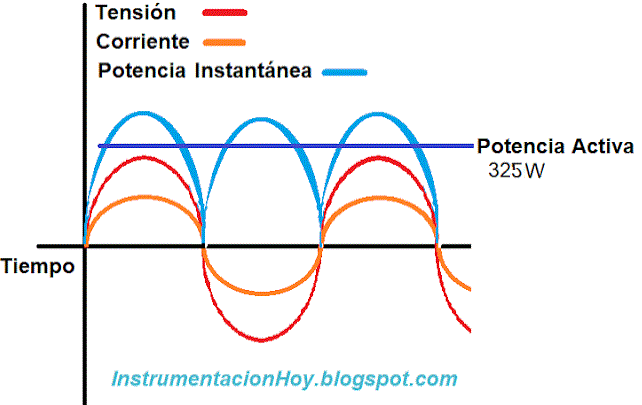

Propuesta es, me quedo con los valores mayores iguales a cero y le saco la media a esos valores. Luego, con potencia activa y aparente, obtengo el desfase.

In [ ]:
C

In [ ]:
df=pd.DataFrame(C, columns=['P_inst'])
df

FFT

In [ ]:

from IPython.display import Image
import numpy as np
import scipy.fftpack as fourier
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves

Ejemplo de juguete FFT

In [ ]:
gn = [0, 1, 2, 3, 4] # Definimos una función en tiempo discreto
gk = fourier.fft(gn) # Calculamos la FFT
gk

In [ ]:
type(gn)

In [ ]:

M_gk = abs(gk)                   # Calculamos la Magnitud de la FFT
Ph_gk = np.angle(gk)             # Calculamos la Fase de la FFT
print('Magnitud: ', M_gk)
print('Angle: ',Ph_gk*180/np.pi)

In [ ]:


Ts = 0.001                                       # Definimos un tiempo y frecuencia de muestreo
Fs=1/Ts
w1 = 2*np.pi*60                                  # Definimos una frecuencia de 60 Hz para la señal 1
w2 = 2*np.pi*223                                 # Definimos una frecuencia de 223 Hz para la señal 2

n = Ts*np.arange(0, 1000)
ruido = np.random.random(len(n))
x = 3*np.sin(w1*n)+2.3*np.sin(w2*n)+ruido        # Construimos una señal compuesta por la señal 1 y 2, y agregamos ruido


plt.plot(n,x,'.-')
plt.xlabel('Tiempo (s)', fontsize='14')
plt.ylabel('Amplitud', fontsize='14')
plt.show()

In [ ]:


gk = fourier.fft(x)                             # Calculamos la FFT
M_gk = abs(gk)                                  # Calculamos la Magnitud de la FFT

F = Fs*np.arange(0, len(x))/len(x)              # Definimos el Vector de Frecuencias

plt.plot(F, M_gk)
plt.xlabel('Frecuencia (Hz)', fontsize='14')
plt.ylabel('Amplitud FFT', fontsize='14')
plt.show()

Sobre el conjunto de datos

In [ ]:
from scipy.fftpack import fft, fftfreq

In [ ]:
lista=YY.tolist()  ### pasar a lista

In [ ]:
gk = fourier.fft(lista)
gk

In [ ]:
M_gk = abs(gk)                   # Calculamos la Magnitud de la FFT
Ph_gk = np.angle(gk)             # Calculamos la Fase de la FFT
print('Magnitud: ', M_gk)
print('Angle: ',Ph_gk*180/np.pi)

In [ ]:
from scipy.fftpack import fft, fftfreq

In [ ]:
n = 2 ** 6 # Número de intervalos
f = 50.0 # Hz
dt = 1 / (f * 16) # Espaciado, 16 puntos por período
Y = fft(lista) / n # Normalizada
frq = fftfreq(n, dt) # Recuperamos las frecuencias
t = np.linspace(0, (n - 1) * dt, n) # Intervalo de tiempo en segundos

In [ ]:
len(lista)

In [ ]:
# Number of samplepoints
N = 2560
# sample frequency
Fs=50
import scipy.fftpack

t = np.linspace(0.0, N/Fs-1/Fs, N)
frequency = np.linspace(0.0, Fs//2, N//2)
spectrum_abs = (2/N)*np.abs(scipy.fftpack.fft(lista))
half_spectrum_abs=spectrum_abs[:N//2]

fig, ax = plt.subplots()
ax.stem(frequency, half_spectrum_abs)
plt.show()

Hanning Windows

https://numpy.org/doc/stable/reference/generated/numpy.hanning.html

Prueba de sincronización de señales

Referencia: https://towardsdatascience.com/how-to-synchronize-time-series-datasets-in-python-f3a1826c21c0

In [ ]:
pip install fastdtw

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.metrics import r2_score
import fastdtw
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

In [ ]:
domiciliario_fasepartida

In [ ]:
#UNIT['IRMS_AVG'] = pd.to_numeric(UNIT['IRMS_AVG'],errors='coerce')
#UNIT['P_AVG'] = pd.to_numeric(UNIT['P_AVG'],errors='coerce')

In [ ]:
x = np.array(domiciliario_fasepartida['AVValor[Voltios]'].fillna(0))
y = np.array(domiciliario_fasepartida['AIValor[Amperios]'].fillna(0))

In [ ]:
distance,path = fastdtw(x, y, dist=euclidean)


In [ ]:
result = []
for i in range(0,len(path)):
    result.append([domiciliario_fasepartida['Datos X'].iloc[path[i][0]],
    domiciliario_fasepartida['AVValor[Voltios]'].iloc[path[i][0]],
    domiciliario_fasepartida['AVValor[Voltios]'].iloc[path[i][1]]])
df_sync = pd.DataFrame(data=result,columns=['DateTime','Power','Current']).dropna()
df_sync = df_sync.drop_duplicates(subset=['DateTime'])
df_sync = df_sync.sort_values(by='DateTime')
df_sync = df_sync.reset_index(drop=True)

In [ ]:
correlation = r2_score(domiciliario_fasepartida['AVValor[Voltios]'],domiciliario_fasepartida['AIValor[Amperios]'])
correlation

In [ ]:
df_sync

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(df_sync.index, df_sync['Power'], df_sync.index, df_sync['Current'])


In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(domiciliario_fasepartida.index, domiciliario_fasepartida['AVValor[Voltios]'], domiciliario_fasepartida.index, domiciliario_fasepartida['AIValor[Amperios]'])
plt.ylim(0,100)

Señales originales

In [ ]:
plt.figure(figsize=(19*2,17.8))
plt.plot(UNIT.index, UNIT['P_AVG'],UNIT.index, UNIT['URMS_AVG'])
plt.ylim(0,300)